
-----

# 📘 ML Project - Task 3: Model Creation, Evaluation & Tuning (Random Forest)
-----

## Cardiovascular Disease Prediction using Random Forest Classifier

## 1. Setup & Data Preparation
**Q1:** Import the necessary libraries (pandas, numpy, matplotlib, seaborn, sklearn).

In [45]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn utilities
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [27]:
!pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)


In [47]:
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost not installed. Please install using: pip install xgboost")

**Q2:** Load the preprocessed dataset (from Task 2) and display the first 5 rows and shape.

In [49]:
# Load cleaned dataset
df = pd.read_csv("cardio_cleaned.csv")

df.head()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,age_40-49,age_50-59,age_60+
0,1,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,False,True,False
1,0,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,False,True,False
2,0,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,False,True,False
3,1,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,True,False,False
4,0,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,True,False,False


In [53]:
# df = df.drop(['age_40-49', 'age_50-59', 'age_60+'], axis=1)
# print("Droped")
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,1,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,0,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,0,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,1,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,0,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [55]:
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [57]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaled Successfully.")


Data Scaled Successfully.


In [59]:
model1 = RandomForestClassifier(
    n_estimators=300,     
    max_depth=12,          
    min_samples_split=15, 
    min_samples_leaf=5,   
    max_features='log2',  
    bootstrap=True,
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1
)


In [61]:
model2 = GradientBoostingClassifier(
    n_estimators=300,        
    learning_rate=0.05,      
    max_depth=4,             
    min_samples_split=20,    
    min_samples_leaf=15,     
    subsample=0.8,           
    max_features='sqrt',     
    validation_fraction=0.1, 
    n_iter_no_change=10,     
    random_state=42
)


In [63]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

if xgb_available:
    model3 = XGBClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=6,
        min_child_weight=1,
        gamma=0.2,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=ratio,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        n_jobs=-1,
        enable_categorical=True
    )


In [65]:
model1.fit(X_train_scaled, y_train)
print("Model 1 Trained.")

Model 1 Trained.


In [67]:
model2.fit(X_train_scaled, y_train)
print("Model 2 Trained.")

Model 2 Trained.


In [69]:
if xgb_available:
    model3.fit(X_train_scaled, y_train)
    print("Model 3 Trained.")


Model 3 Trained.


In [71]:
y_pred1 = model1.predict(X_test_scaled)

In [73]:
y_pred2 = model2.predict(X_test_scaled)

In [75]:
if xgb_available:
    y_pred3 = model3.predict(X_test_scaled)

In [77]:
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Random Forest Accuracy: {accuracy1 * 100:.2f}%")

accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Gradient Boosting Accuracy: {accuracy2 * 100:.2f}%")

if xgb_available:
    accuracy3 = accuracy_score(y_test, y_pred3)
    print(f"XGBoost Accuracy: {accuracy3 * 100:.2f}%")


Random Forest Accuracy: 73.85%
Gradient Boosting Accuracy: 73.70%
XGBoost Accuracy: 74.02%


In [91]:
models = [model1, model2, model3]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost']
predictions = [y_pred1, y_pred2, y_pred3]

print("="*60)
print("FINAL MODEL COMPARISON REPORT")
print("="*60)

for name, pred in zip(model_names, predictions):
    print(f"\n--- {name} ---")
    print(classification_report(y_test, pred))

FINAL MODEL COMPARISON REPORT

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6870
           1       0.76      0.69      0.72      6676

    accuracy                           0.74     13546
   macro avg       0.74      0.74      0.74     13546
weighted avg       0.74      0.74      0.74     13546


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6870
           1       0.76      0.68      0.72      6676

    accuracy                           0.74     13546
   macro avg       0.74      0.74      0.74     13546
weighted avg       0.74      0.74      0.74     13546


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6870
           1       0.76      0.70      0.73      6676

    accuracy                           0.74     13546
   macro avg       0.74      0.

In [93]:
def overfit_check(model, X_train, y_train, X_test, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{model_name}")
    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Testing Accuracy:  {test_acc*100:.2f}%")

    if (train_acc - test_acc) > 0.10:
        print("⚠️ Warning: Potential Overfitting detected.")
    elif test_acc > train_acc:
        print("⚠️ Potential Underfitting detected.")
    else:
        print("✅ Good Fit: Train and Test scores are balanced.")


# Run checks
overfit_check(model1, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest")
overfit_check(model2, X_train_scaled, y_train, X_test_scaled, y_test, "Gradient Boosting")
overfit_check(model3, X_train_scaled, y_train, X_test_scaled, y_test, "XGBoost")



Random Forest
Training Accuracy: 75.95%
Testing Accuracy:  73.85%
✅ Good Fit: Train and Test scores are balanced.

Gradient Boosting
Training Accuracy: 73.85%
Testing Accuracy:  73.70%
✅ Good Fit: Train and Test scores are balanced.

XGBoost
Training Accuracy: 74.94%
Testing Accuracy:  74.02%
✅ Good Fit: Train and Test scores are balanced.


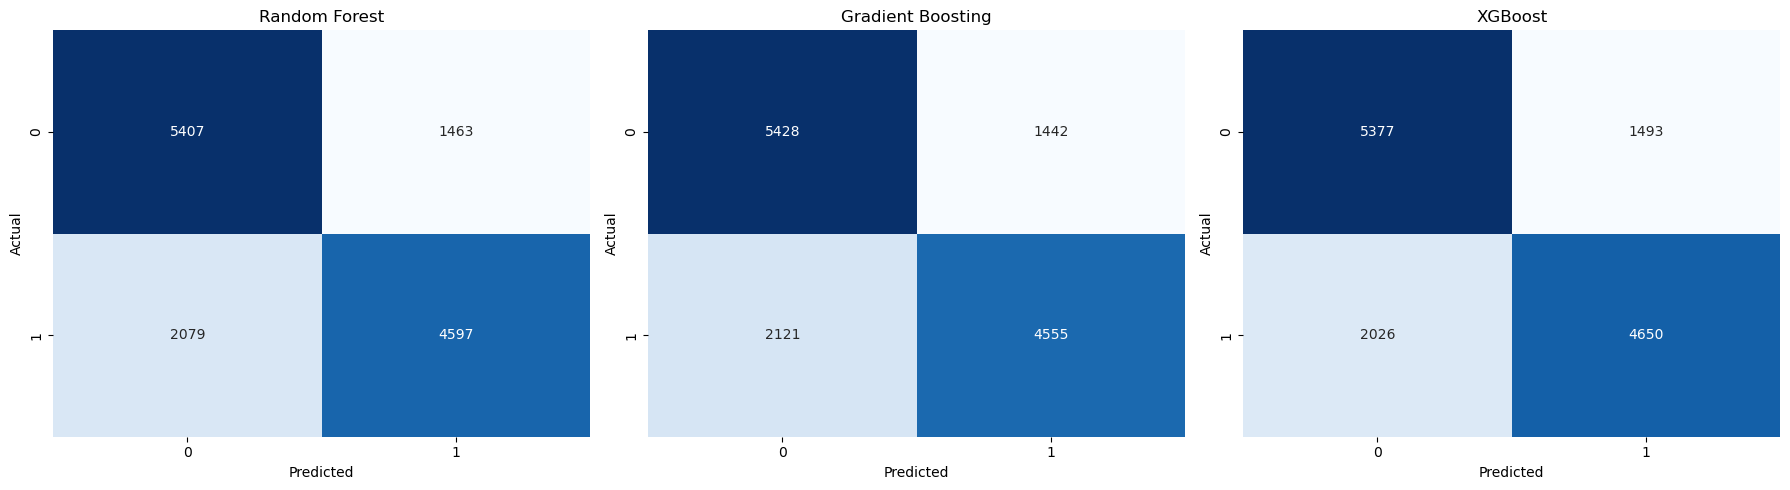

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

predictions = [y_pred1, y_pred2, y_pred3]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost']

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(model_names[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [85]:
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [10, 12],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [5]
}

rf_random = RandomizedSearchCV(
    model1,
    rf_params,
    n_iter=3,         
    cv=3,              
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train_scaled, y_train)
best_rf = rf_random.best_estimator_
print("Fast RF tuning done.")


Fast RF tuning done.


In [87]:
gb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_leaf': [10, 15]
}

gb_random = RandomizedSearchCV(
    model2,
    gb_params,
    n_iter=3,
    cv=3,
    scoring='accuracy',
    random_state=42
)

gb_random.fit(X_train_scaled, y_train)
best_gb = gb_random.best_estimator_
print("Fast GB tuning done.")


Fast GB tuning done.


In [89]:
if xgb_available:
    xgb_params = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'max_depth': [5, 6],
        'subsample': [0.8],
        'colsample_bytree': [0.8]
    }

    xgb_random = RandomizedSearchCV(
        model3,
        xgb_params,
        n_iter=3,
        cv=3,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    xgb_random.fit(X_train_scaled, y_train)
    best_xgb = xgb_random.best_estimator_
    print("Fast XGB tuning done.")


Fast XGB tuning done.


In [95]:
import pickle

best_model = best_rf

data_to_save = {
    "model": best_model,
    "scaler": scaler
}

with open('cardio_model_new.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print("✅ Model and Scaler saved to 'cardio_model_new.pkl'")


✅ Model and Scaler saved to 'cardio_model_new.pkl'


In [101]:
import pandas as pd

# Input data (AGE IN YEARS)
input_data = {
    'age_years': 55,          # <-- age directly in years
    'gender': 1,
    'height': 156,
    'weight': 85.0,
    'ap_hi': 140,
    'ap_lo': 90,
    'cholesterol': 3,
    'gluc': 1,
    'smoke': 0,
    'alco': 0,
    'active': 1
}

# Feature engineering (same as training)
input_data['bmi'] = input_data['weight'] / ((input_data['height'] / 100) ** 2)

columns = [
    'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active',
    'age_years', 'bmi',
]

df_single = pd.DataFrame([input_data], columns=columns)

# Scale input
X_single_scaled = scaler.transform(df_single)

# Predict using tuned Random Forest
prediction = best_rf.predict(X_single_scaled)[0]
probability = best_rf.predict_proba(X_single_scaled)[0][1]

print("\nInput Data:")
print(df_single.iloc[0])

print("\nPrediction (0: No Cardio Disease, 1: Cardio Disease):", prediction)
print(f"Probability of Cardio Disease: {probability:.2f}")



Input Data:
gender           1.000000
height         156.000000
weight          85.000000
ap_hi          140.000000
ap_lo           90.000000
cholesterol      3.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
age_years       55.000000
bmi             34.927679
Name: 0, dtype: float64

Prediction (0: No Cardio Disease, 1: Cardio Disease): 1
Probability of Cardio Disease: 0.83
